In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
!ls ../data

ChCh-Miner_durgbank-chem-chem.tsv       DD-Miner_miner-disease-disease.tsv
ChCh-Miner_durgbank-chem-chem.tsv.gz    DD-Miner_miner-disease-disease.tsv.gz
ChG-InterDecagon_targets.csv.gz         GP-Miner_miner-gene-protein.tsv
ChG-Miner_miner-chem-gene.tsv           GP-Miner_miner-gene-protein.tsv.gz
ChG-Miner_miner-chem-gene.tsv.gz        PP-Decagon_ppi.csv.gz
ChG-TargetDecagon_targets (1).csv.gz    PP-Pathways_ppi.csv.gz
ChG-TargetDecagon_targets (2).csv.gz    bio-decagon-ppi.csv
ChG-TargetDecagon_targets.csv.gz        bio-decagon-ppi.tar.gz
D-DoMiner_miner-diseaseDOID-entity.tsv  bio-decagon-targets.csv
D-DoMiner_miner-diseaseDOID.tsv.gz      bio-decagon-targets.tar.gz
D-MeshMiner_miner-disease-entity.tsv    ddinter_downloads_code_V.csv
D-MeshMiner_miner-disease-entity.tsv.gz drugbank.txt
DCh-Miner_miner-disease-chemical.tsv


In [57]:
# MID = '# Disease MESH_ID'
# df_disease_drug = pd.read_csv('../data/DCh-Miner_miner-disease-chemical.tsv', sep='\t').rename(
#     columns={'# Disease(MESH)': '# Disease MESH_ID', 'Chemical': 'chemical'}
# )
# df_disease_entity = pd.read_csv('../data/D-MeshMiner_miner-disease-entity.tsv', sep='\t').rename(
#     columns={'# MESH_ID': '# Disease MESH_ID'}
# )
df_drug_drug = pd.read_csv('../data/ChCh-Miner_durgbank-chem-chem.tsv', sep='\t', names=['chemical_a', 'chemical_b'])
# df_disease_disease = pd.read_csv('../data/DD-Miner_miner-disease-disease.tsv', sep='\t').rename(
#     columns={}
# )
df_pp = pd.read_csv('../data/bio-decagon-ppi.csv')
df_dt = pd.read_csv('../data/bio-decagon-targets.csv')
df = pd.read_csv('../data/drugbank.txt', sep='\t')
df = df.drop_duplicates(subset=['DrugbankID', 'CID'], keep='first')
df.head()

In [357]:
df_disease_disease

,# Disease(DOID),Disease(DOID)
0,DOID:0001816,DOID:1115
1,DOID:0002116,DOID:10124
2,DOID:0014667,DOID:4
3,DOID:0050004,DOID:10400
4,DOID:0050012,DOID:934
...,...,...
6872,DOID:9987,DOID:4143
6873,DOID:9988,DOID:8200
6874,DOID:999,DOID:9500
6875,DOID:9993,DOID:4194


In [355]:
df_disease_drug

,# Disease MESH_ID,chemical
0,MESH:D005923,DB00564
1,MESH:D009503,DB01072
2,MESH:D016115,DB01759
3,MESH:D018476,DB00451
4,MESH:C567059,DB00641
...,...,...
466652,MESH:C565545,DB00482
466653,MESH:D009164,DB00977
466654,MESH:D010518,DB04216
466655,MESH:D002653,DB02701


In [314]:
df_poly_drug = pd.read_csv('../data/ChChSe-Decagon_polypharmacy.csv')

In [340]:
df_side_effect_et = pd.read_csv('../data/bio-decagon-effectcategories.csv')

In [342]:
df_side_effect_et[df_side_effect_et['Disease Class']=='gastrointestinal system disease']

,Side Effect,Side Effect Name,Disease Class
0,C0017152,gastric inflammation,gastrointestinal system disease
15,C0030446,adynamic ileus,gastrointestinal system disease
32,C0013295,duodenal ulcer,gastrointestinal system disease
33,C0013298,duodenitis,gastrointestinal system disease
37,C0017574,gingivitis,gastrointestinal system disease
68,C0162529,colitis ischemic,gastrointestinal system disease
78,C0023891,alcoholic cirrhosis,gastrointestinal system disease
79,C0023890,cirrhosis,gastrointestinal system disease
81,C0023895,disease of liver,gastrointestinal system disease
99,C1257843,colitis pseudomembranous,gastrointestinal system disease


In [339]:
df_poly_drug[df_poly_drug['Polypharmacy Side Effect']=='C0151714']

,# STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
17283,CID000005645,CID000074989,C0151714,hypermagnesemia
36511,CID000000271,CID000004168,C0151714,hypermagnesemia
41475,CID000004927,CID000077999,C0151714,hypermagnesemia
42475,CID000000853,CID000003062,C0151714,hypermagnesemia
...,...,...,...,...
4602853,CID000000271,CID000002269,C0151714,hypermagnesemia
4624803,CID000002269,CID000002764,C0151714,hypermagnesemia
4627388,CID000000853,CID000003345,C0151714,hypermagnesemia
4635311,CID000003345,CID000004943,C0151714,hypermagnesemia


In [315]:
df_poly_drug

,# STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
1,CID000002173,CID000003345,C0035344,retinopathy of prematurity
2,CID000002173,CID000003345,C0004144,atelectasis
3,CID000002173,CID000003345,C0002063,alkalosis
4,CID000002173,CID000003345,C0004604,Back Ache
...,...,...,...,...
4649436,CID000003461,CID000003954,C0149871,deep vein thromboses
4649437,CID000003461,CID000003954,C0035410,rhabdomyolysis
4649438,CID000003461,CID000003954,C0043096,loss of weight
4649439,CID000003461,CID000003954,C0003962,ascites


In [323]:
df_poly_drug[df_poly_drug["# STITCH 1"]=='CID000002173']

,# STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
1,CID000002173,CID000003345,C0035344,retinopathy of prematurity
2,CID000002173,CID000003345,C0004144,atelectasis
3,CID000002173,CID000003345,C0002063,alkalosis
4,CID000002173,CID000003345,C0004604,Back Ache
...,...,...,...,...
4638163,CID000002173,CID000002617,C0035410,rhabdomyolysis
4638164,CID000002173,CID000002617,C0016169,fistula
4638165,CID000002173,CID000002617,C0036974,cardiovascular collapse
4638166,CID000002173,CID000002617,C0013274,patent ductus arteriosis


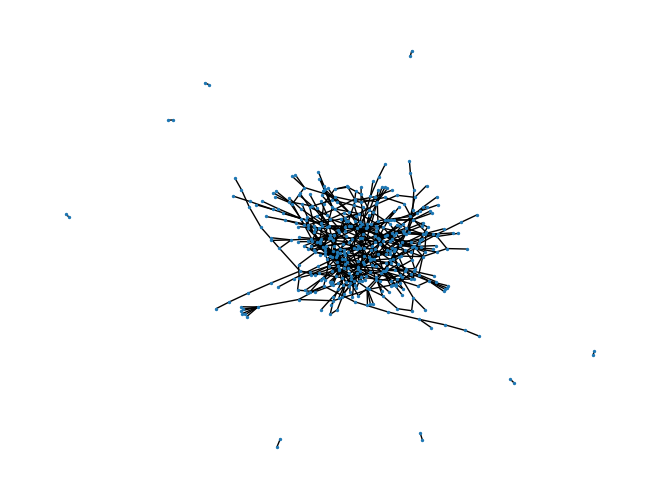

In [337]:
Gp = nx.Graph()
Gp.add_edges_from(list(df_poly_drug[['# STITCH 1','STITCH 2']].head(40000).itertuples(index=False, name=None)))
nx.draw(Gp, node_size=2)

In [325]:
df_poly_drug['# STITCH 1'].unique().shape

(616,)

In [322]:
df_poly_drug[df_poly_drug["# STITCH 1"]=='CID000002173']['Side Effect Name'].unique().shape

(478,)

In [318]:
df_poly_drug['Polypharmacy Side Effect'].unique().shape

(1317,)

In [350]:
len(set(df_poly_drug['# STITCH 1'].unique()).union(set(df_poly_drug['STITCH 2'].unique())))
#.shape

645

In [347]:
df_poly_drug['STITCH 2'].unique().shape

(634,)

In [351]:
645*645

416025

In [352]:
df_poly_drug.drop_duplicates(subset=['# STITCH 1', 'STITCH 2'], keep='first')

,# STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
56,CID000005206,CID000009433,C0040034,thrombocytopenia
68,CID000003929,CID000150610,C0015230,eruption
92,CID000001302,CID000005064,C0004601,back injury
226,CID000005267,CID000010631,C0043096,loss of weight
...,...,...,...,...
4649065,CID000004889,CID000060754,C0151908,dry skin
4649085,CID000003075,CID000003339,C0497156,Adenopathy
4649252,CID000002477,CID000002541,C0522055,abnormal ECG
4649335,CID000003750,CID000027661,C0017152,gastric inflammation


In [343]:
df_poly_drug

,# STITCH 1,STITCH 2,Polypharmacy Side Effect,Side Effect Name
0,CID000002173,CID000003345,C0151714,hypermagnesemia
1,CID000002173,CID000003345,C0035344,retinopathy of prematurity
2,CID000002173,CID000003345,C0004144,atelectasis
3,CID000002173,CID000003345,C0002063,alkalosis
4,CID000002173,CID000003345,C0004604,Back Ache
...,...,...,...,...
4649436,CID000003461,CID000003954,C0149871,deep vein thromboses
4649437,CID000003461,CID000003954,C0035410,rhabdomyolysis
4649438,CID000003461,CID000003954,C0043096,loss of weight
4649439,CID000003461,CID000003954,C0003962,ascites


In [317]:
df_poly_drug['Side Effect Name'].unique().shape

(1317,)

### Convert CID to Drug Bank ID

In [ ]:
def cid_to_dbid(cid):
    poi = df[df.CID==cid]
    if poi.shape[0]:
        return poi.iloc[0].DrugbankID
    else:
        return np.nan
    
df_dt['drug'] = df_dt.STITCH.apply(cid_to_dbid)

all_drugs = set(df_dt.drug).union(
    df_drug_drug.chemical_a).union(df_drug_drug.chemical_b)


In [300]:
df_drug_drug.head()

,chemical_a,chemical_b
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275


In [303]:
# set(df_drug_drug.chemical_a).union(set(df_drug_drug.chemical_b))

In [299]:
import pickle

all_drugs = set(df_dt.drug).union(
    df_drug_drug.chemical_a).union(df_drug_drug.chemical_b)


with open('../data/all_drugs.pickle', 'wb') as f:
    pickle.dump(all_drugs, f)


In [197]:
df_dt.STITCH.unique().shape[0]+(df_dt.Gene.unique().shape[0])

3932

In [353]:
df_pp

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343
...,...,...
715607,5634,5636
715608,5635,5636
715609,5635,5631
715610,5636,5631


In [354]:
df_drug

,STITCH,Gene,drug
0,CID000003488,1559,DB01016
1,CID000003488,8647,DB01016
2,CID000077992,3351,DB00998
3,CID000077992,3350,DB00998
4,CID000077992,3352,DB00998
...,...,...,...
18685,CID000005152,8484,DB00938
18686,CID000005152,81491,DB00938
18687,CID000005152,83551,DB00938
18688,CID000005152,680,DB00938


In [305]:
G = nx.Graph()
G.add_edges_from(list(df_pp.head(1000).itertuples(index=False, name=None)))
# nx.draw(G, node_size=5)

In [309]:
G.add_edges_from(list(df_dt[['Gene', 'drug']].head(100).itertuples(index=False, name=None)))

In [312]:
np.ones(20000*20000)

array([1., 1., 1., ..., 1., 1., 1.])

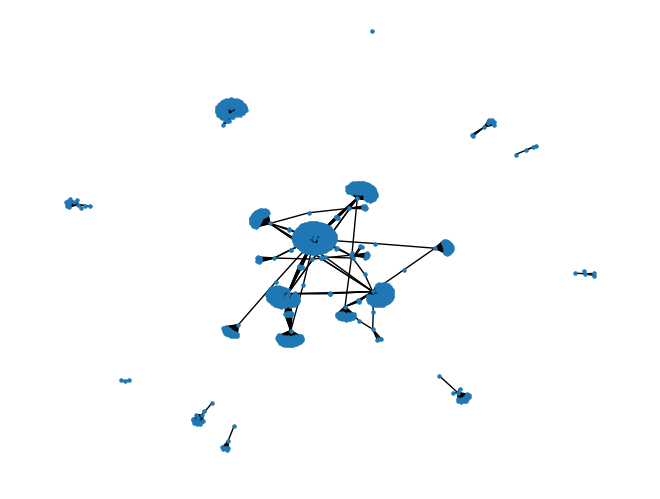

In [311]:
nx.draw(G, node_size=5)

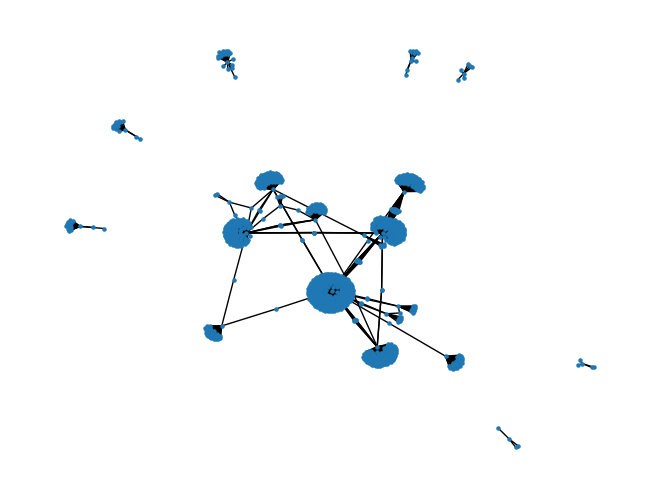

In [306]:
nx.draw(G, node_size=5)

In [243]:
df_pp.head()

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343


In [256]:
paths = nx.shortest_path(G, source=1559)

In [259]:
paths

{1559: [1559],
 1544: [1559, 1544],
 1543: [1559, 1543],
 6776: [1559, 6776],
 8529: [1559, 8529],
 2180: [1559, 2180],
 239: [1559, 239],
 113612: [1559, 113612],
 5076: [1559, 5076],
 1579: [1559, 1579],
 1577: [1559, 1577],
 54658: [1559, 54658],
 5243: [1559, 5243],
 216: [1559, 216],
 240: [1559, 240],
 495: [1559, 495],
 316: [1559, 316],
 119391: [1559, 119391],
 10452: [1559, 10452],
 1666: [1559, 1666],
 10599: [1559, 10599],
 9446: [1559, 9446],
 79799: [1559, 79799],
 391013: [1559, 391013],
 8398: [1559, 8398],
 8399: [1559, 8399],
 3195: [1559, 3195],
 479: [1559, 479],
 79001: [1559, 79001],
 4259: [1559, 4259],
 4258: [1559, 4258],
 4257: [1559, 4257],
 2052: [1559, 2052],
 84647: [1559, 84647],
 54600: [1559, 54600],
 50487: [1559, 50487],
 9360: [1559, 9360],
 5742: [1559, 5742],
 5743: [1559, 5743],
 80221: [1559, 80221],
 81579: [1559, 81579],
 2327: [1559, 2327],
 2326: [1559, 2326],
 2329: [1559, 2329],
 2328: [1559, 2328],
 2155: [1559, 2155],
 9685: [1559, 9685],

In [270]:
len(set(df_pp['Gene 1'].unique()).union(set(df_pp['Gene 2'].unique())).union(df_dt.Gene).union(df_dt.STITCH).union(
    df_drug_drug.chemical_a).union(df_drug_drug.chemical_b))


20887

In [266]:
df_drug_drug

,chemical_a,chemical_b
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [258]:
for k, lst in paths.items():
    if not len(lst):
        print(k)

In [244]:
from networkx.algorithms import tournament
dt_genes = df_dt.Gene.unique()
tournament.is_reachable(G, 114787, 375519)

NetworkXNotImplemented: not implemented for undirected type

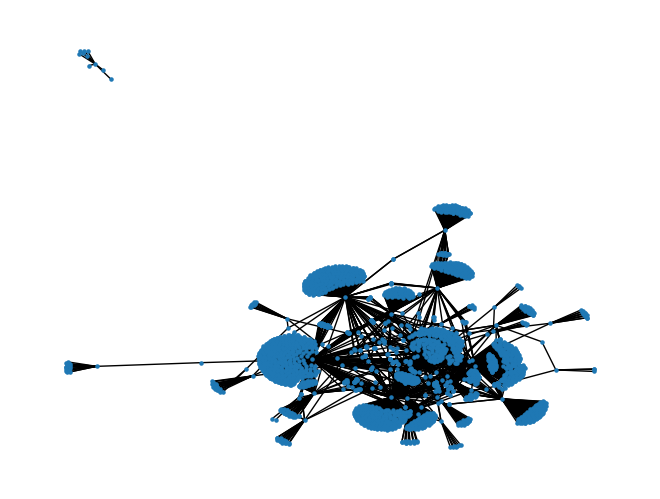

In [261]:
G = nx.Graph()
G.add_edges_from(list(df_pp.head(3000).itertuples(index=False, name=None)))
nx.draw(G, node_size=5)

In [263]:
(17500*17500)-6000000000

-5693750000

In [192]:
df_pp[(df_pp['Gene 1']==114787)|(df_pp['Gene 2']==114787)]

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343
5,114787,8089
6,114787,2775
7,114787,3184
8,114787,29785
9,114787,2781


In [166]:
df_pp['Gene 2'].unique().shape

(17472,)

In [155]:
df_drug_drug.chemical_a.unique().shape

(1317,)

In [145]:
# list(df_dt.itertuples(index=False, name=None))
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [129]:
df = df.drop_duplicates(subset=['DrugbankID', 'CID'], keep='first')

In [126]:
df_dt.STITCH.unique().shape

(284,)

In [128]:
df_drug_drug.chemical_a.unique().shape

(1317,)

In [102]:
df_dt.shape

(18690, 2)

In [101]:
len(set(df_pp['Gene 2'].unique()).intersection(df_dt.Gene.unique()))

3432

In [168]:
df_pp

,Gene 1,Gene 2
0,114787,375519
1,114787,285613
2,114787,7448
3,114787,4914
4,114787,51343
...,...,...
715607,5634,5636
715608,5635,5636
715609,5635,5631
715610,5636,5631


In [119]:
len(set(df_dt['STITCH']).difference(df.CID))

43

In [97]:
df_dt      #DB00938   5152

,STITCH,Gene
0,CID000003488,1559
1,CID000003488,8647
2,CID000077992,3351
3,CID000077992,3350
4,CID000077992,3352
...,...,...
18685,CID000005152,8484
18686,CID000005152,81491
18687,CID000005152,83551
18688,CID000005152,680


In [109]:
df_drug_drug

,chemical_a,chemical_b
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [108]:
df_drug_target

,# Drug,Gene
0,"CID000060752,3757",NaN
1,"CID006918155,2908",NaN
2,"CID103052762,3359",NaN
3,"CID023668479,1230",NaN
4,"CID000028864,1269",NaN
...,...,...
131029,"CID000092721,3426",NaN
131030,"CID000092721,8858",NaN
131031,"CID000092721,10942",NaN
131032,"CID100115355,3242",NaN


In [83]:
df_drug_target = pd.read_csv('../data/ChG-InterDecagon_targets.csv.gz', sep='\t')
df_gene_protein = pd.read_csv('../data/GP-Miner_miner-gene-protein.tsv', sep='\t')
df_protein_protein = pd.read_csv('../data/PP-Decagon_ppi.csv.gz', sep='\t')
df_drug_target
df_gene_protein

,# Gene,Protein
0,ENSG00000198888,ENSP00000354687
1,ENSG00000198763,ENSP00000355046
2,ENSG00000198804,ENSP00000354499
3,ENSG00000198712,ENSP00000354876
4,ENSG00000228253,ENSP00000355265
...,...,...
102445,ENSG00000282892,ENSP00000489099
102446,ENSG00000282892,ENSP00000489383
102447,ENSG00000282892,ENSP00000488932
102448,ENSG00000282981,ENSP00000488999


In [92]:
df_drug_drug

,chemical_a,chemical_b
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [91]:
df_gene_protein

,# Gene,Protein
0,ENSG00000198888,ENSP00000354687
1,ENSG00000198763,ENSP00000355046
2,ENSG00000198804,ENSP00000354499
3,ENSG00000198712,ENSP00000354876
4,ENSG00000228253,ENSP00000355265
...,...,...
102445,ENSG00000282892,ENSP00000489099
102446,ENSG00000282892,ENSP00000489383
102447,ENSG00000282892,ENSP00000488932
102448,ENSG00000282981,ENSP00000488999


In [89]:
df_drug_target

,# Drug,Gene
0,"CID000060752,3757",NaN
1,"CID006918155,2908",NaN
2,"CID103052762,3359",NaN
3,"CID023668479,1230",NaN
4,"CID000028864,1269",NaN
...,...,...
131029,"CID000092721,3426",NaN
131030,"CID000092721,8858",NaN
131031,"CID000092721,10942",NaN
131032,"CID100115355,3242",NaN


In [90]:
df_drug_drug

,chemical_a,chemical_b
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [85]:
df_protein_protein 

,"114787,375519"
0,"114787,285613"
1,"114787,7448"
2,"114787,4914"
3,"114787,51343"
4,"114787,8089"
...,...
715606,"5634,5636"
715607,"5635,5636"
715608,"5635,5631"
715609,"5636,5631"


In [76]:
df_drug_target

,# Drug,Gene
0,"CID000060752,3757",NaN
1,"CID006918155,2908",NaN
2,"CID103052762,3359",NaN
3,"CID023668479,1230",NaN
4,"CID000028864,1269",NaN
...,...,...
131029,"CID000092721,3426",NaN
131030,"CID000092721,8858",NaN
131031,"CID000092721,10942",NaN
131032,"CID100115355,3242",NaN


In [74]:
df_drug_drug

,chemical_a,chemical_b
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [61]:
df_disease_disease[df_disease_disease['# Disease(DOID)'].str.contains('5923')]

,# Disease(DOID),Disease(DOID)
5322,DOID:5923,DOID:4897


In [65]:
df_disease_drug[df_disease_drug['# Disease MESH_ID'].str.contains('4897')]

,# Disease MESH_ID,chemical
8462,MESH:D014897,DB00479
40578,MESH:D014897,DB04528
52784,MESH:D014897,DB02587
83485,MESH:D014897,DB00470
127413,MESH:D014897,DB00316
158749,MESH:D014897,DB00515
168016,MESH:D014897,DB00499
210529,MESH:D014897,DB04690
261737,MESH:D014897,DB00684
318286,MESH:D014897,DB00313


In [44]:
df_disease_drug

,# Disease MESH_ID,Chemical
0,MESH:D005923,DB00564
1,MESH:D009503,DB01072
2,MESH:D016115,DB01759
3,MESH:D018476,DB00451
4,MESH:C567059,DB00641
...,...,...
466652,MESH:C565545,DB00482
466653,MESH:D009164,DB00977
466654,MESH:D010518,DB04216
466655,MESH:D002653,DB02701


In [36]:
df_disease_entity.head()

,# MESH_ID,Name,Definitions,Synonyms
0,MESH:C538288,10p Deletion Syndrome (Partial),NaN,"Chromosome 10, 10p- Partial|Chromosome 10, mon..."
1,MESH:C535484,13q deletion syndrome,NaN,Chromosome 13q deletion|Chromosome 13q deletio...
2,MESH:C579849,15q24 Microdeletion,NaN,15q24 Deletion|15q24 Microdeletion Syndrome|In...
3,MESH:C579850,16p11.2 Deletion Syndrome,NaN,NaN
4,MESH:C567076,"17,20-Lyase Deficiency, Isolated",NaN,"17-Alpha-Hydroxylase-17,20-Lyase Deficiency, C..."


In [41]:
df_disease_entity[df_disease_entity['# MESH_ID'].str.contains('MESH:D005923')]

,# MESH_ID,Name,Definitions,Synonyms
4454,MESH:D005923,"Glomerulosclerosis, Focal Segmental",A clinicopathological syndrome or diagnostic t...,Focal Glomerulosclerosis|Focal Sclerosing Glom...


In [47]:
MID = '# Disease MESH_ID'
len(set(df_disease_entity[MID].unique()).intersection(df_disease_drug[MID].unique()))

5165

In [49]:
df_disease_entity[]

(5536,)